# Region segmentation for Electric Vehicles

In this assignment we are going to take in the infrastructural data in India which is relevant for electric vehicles. We are going to divide the states into regions or segments.We will then analyse which segment is proper for the electric vehicles. 

In [36]:
#importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
# Load the datasets
evi = pd.read_excel('C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Internships\\Feynn Labs\\Electric vehicle India\\India EV infrastructure.xlsx')
evi.head()

,State Name,No. of Operational PCS,road density(m/km sqd.),Road length state in KM,AQI,avg. temp,avg. humidity,Total\n(in MW),% Renewable
0,Andhra Pradesh,587,16.50,13788,80,33,61,27442.32,0.3978
1,Arunachal Pradesh,9,23.79,10518,62,32,72,1259.34,1.0000
2,Assam,48,11.00,3134,74,29,84,1876.40,0.2819
3,Bihar,83,9.00,3766,72,31,76,8787.41,0.0441
4,Chhattisgarh,46,13.00,3419,58,28,75,24688.32,0.0405


In [4]:
#examining the dataset
evi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State Name               29 non-null     object 
 1   No. of Operational PCS   29 non-null     int64  
 2   road density(m/km sqd.)  29 non-null     float64
 3   Road length state in KM  29 non-null     int64  
 4   AQI                      29 non-null     int64  
 5   avg. temp                29 non-null     int64  
 6   avg. humidity            29 non-null     int64  
 7   Total
(in MW)            29 non-null     float64
 8   % Renewable              29 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 2.2+ KB


In [5]:
# Trim extra spaces in column names
evi= pd.DataFrame(evi)


evi.columns = evi.columns.str.strip()


print(evi)


           State Name  No. of Operational PCS  road density(m/km sqd.)  \
0      Andhra Pradesh                     587                    16.50   
1   Arunachal Pradesh                       9                    23.79   
2               Assam                      48                    11.00   
3               Bihar                      83                     9.00   
4        Chhattisgarh                      46                    13.00   
5               Delhi                    1845                     0.00   
6                 Goa                      44                    27.00   
7             Gujarat                     195                    10.00   
8             Haryana                     232                    18.00   
9    Himachal Pradesh                      27                    20.00   
10    Jammu & Kashmir                      24                    21.00   
11          Jharkhand                      60                    16.00   
12          Karnataka                 

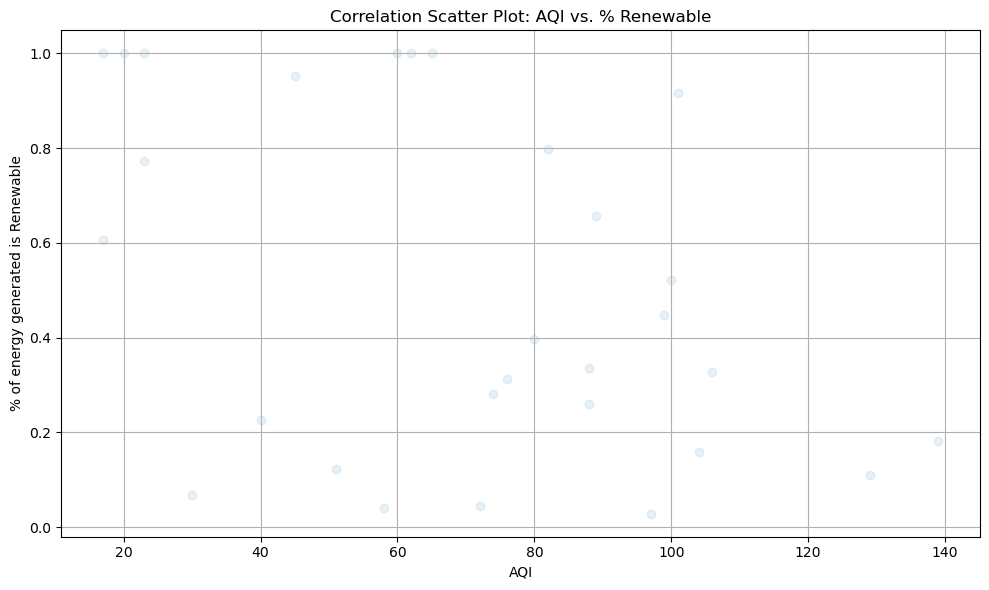

In [6]:
# Correlation between renewable energy percent and AQI 
plt.figure(figsize=(10, 6))
plt.scatter(evi['AQI'], evi['% Renewable'], alpha=0.1)
plt.xlabel('AQI')
plt.ylabel('% of energy generated is Renewable')
plt.title('Correlation Scatter Plot: AQI vs. % Renewable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Calculate the correlation coefficient
correlation_coefficient = evi['AQI'].corr(evi['% Renewable'])

print(f"Correlation Coefficient between AQI and % Renewable: {correlation_coefficient}")

Correlation Coefficient between AQI and % Renewable: -0.42659288962921693


*We can clearly see there is a moderate negative correlation between AQI and renewable energy percent which means a higher percentage of renewable energy will lead to lower Pollution*

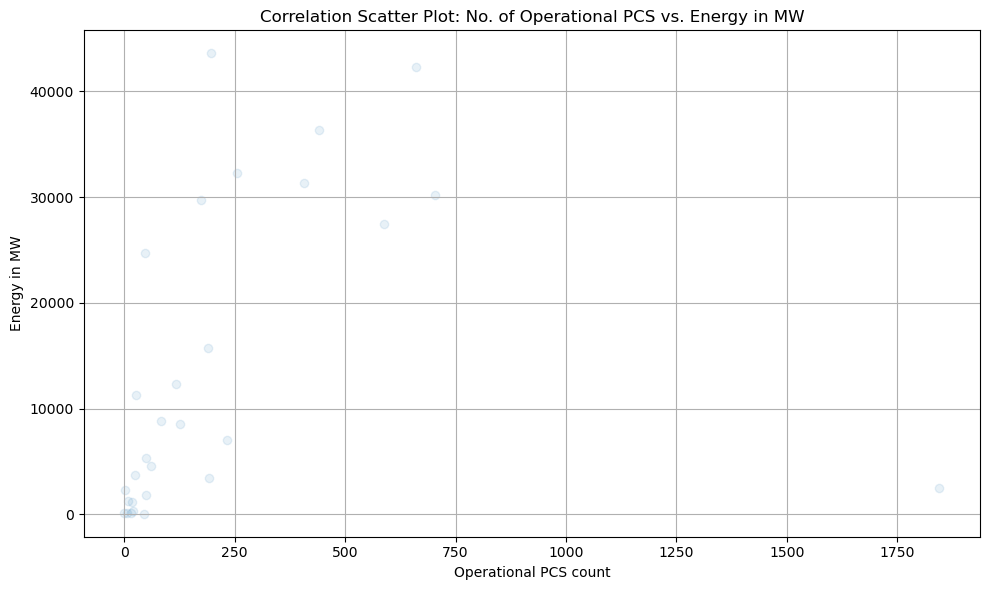

In [8]:
# Correlation between Electricity generated and Number of PCS stations
plt.figure(figsize=(10, 6))
plt.scatter(evi['No. of Operational PCS'], evi['Total\n(in MW)'], alpha=0.1)
plt.xlabel('Operational PCS count')
plt.ylabel('Energy in MW')
plt.title('Correlation Scatter Plot: No. of Operational PCS vs. Energy in MW')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Calculate the correlation coefficient
correlation_coefficient = evi['No. of Operational PCS'].corr(evi['Total\n(in MW)'])

print(f"Correlation Coefficient between No. of Operational PCS and Total energy (in MW): {correlation_coefficient}")

Correlation Coefficient between No. of Operational PCS and Total energy (in MW): 0.2881456275037449


*Remarks: There is a moderate positive correlation between number of PCS and the Energy produced in MW.*

In [10]:
#top 5 states by longest roads
road_length = evi.groupby('State Name')['Road length state in KM'].sum()

top_states_road = road_length.sort_values(ascending=False).head(5)
top_states_road

State Name
Maharashtra    33705
Delhi          28408
Tamil Nadu     26985
Karnataka      20738
Gujarat        19761
Name: Road length state in KM, dtype: int64

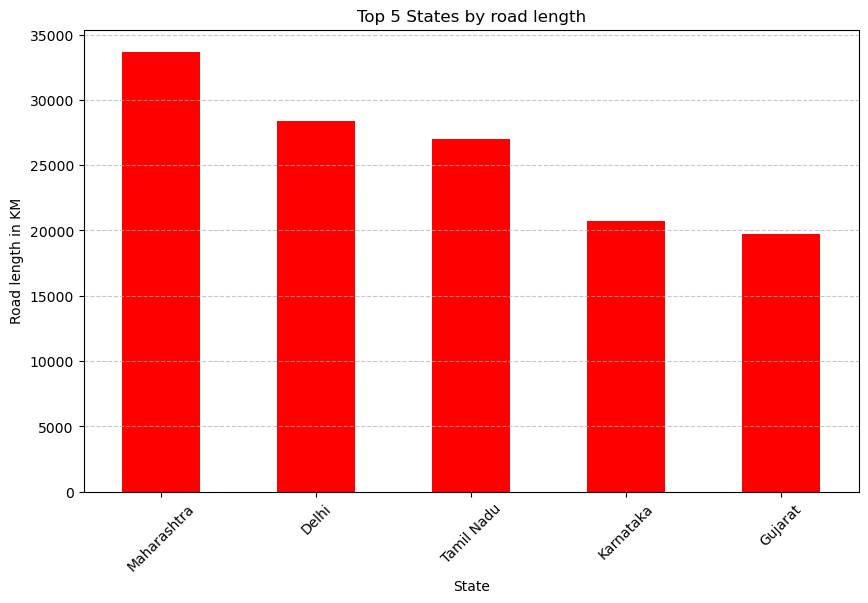

In [11]:
# Creating a bar graph
plt.figure(figsize=(10, 6))
top_states_road.plot(kind='bar', color='red')
plt.xlabel('State')
plt.ylabel('Road length in KM')
plt.title('Top 5 States by road length')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# correlation matrix
correlation_matrix = evi.corr()
correlation_matrix

,No. of Operational PCS,road density(m/km sqd.),Road length state in KM,AQI,avg. temp,avg. humidity,Total\n(in MW),% Renewable
No. of Operational PCS,1.000000,-0.593356,0.760366,0.523558,0.283339,-0.324678,0.288146,-0.301876
road density(m/km sqd.),-0.593356,1.000000,-0.657142,-0.374633,-0.281083,0.223579,-0.692280,0.489199
Road length state in KM,0.760366,-0.657142,1.000000,0.489625,0.296718,-0.158800,0.688153,-0.192832
AQI,0.523558,-0.374633,0.489625,1.000000,0.644877,-0.598740,0.311552,-0.426593
avg. temp,0.283339,-0.281083,0.296718,0.644877,1.000000,-0.630697,0.285264,-0.161685
avg. humidity,-0.324678,0.223579,-0.158800,-0.598740,-0.630697,1.000000,-0.161132,-0.003206
Total\n(in MW),0.288146,-0.692280,0.688153,0.311552,0.285264,-0.161132,1.000000,-0.284154
% Renewable,-0.301876,0.489199,-0.192832,-0.426593,-0.161685,-0.003206,-0.284154,1.000000


<AxesSubplot: >

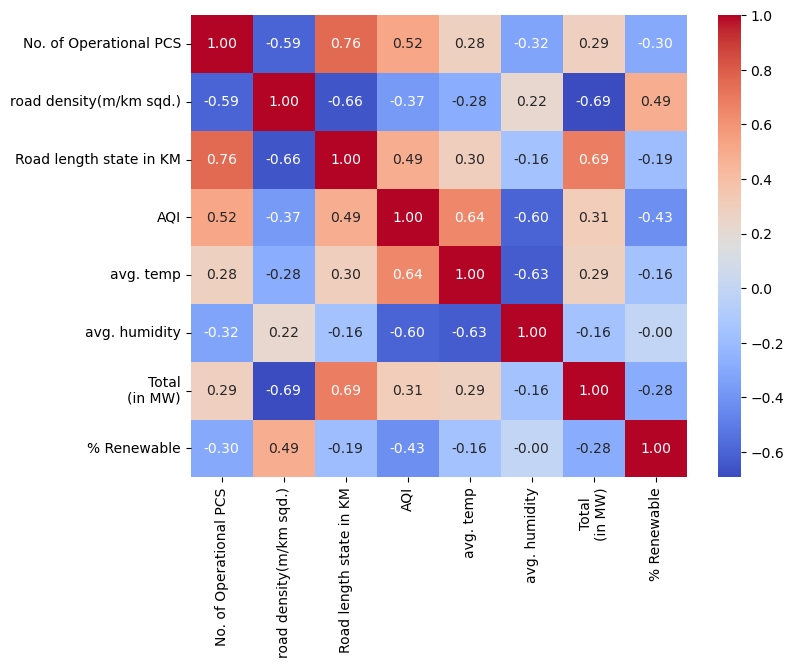

In [13]:
# correlation plot 
plt.figure(figsize=(8, 6)) 
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


In [14]:
# Group the data by state and seeing road density
statewiseroaddensity = evi.groupby('State Name')['road density(m/km sqd.)'].sum()
statewiseroaddensity

State Name
Andhra Pradesh       16.50
Arunachal Pradesh    23.79
Assam                11.00
Bihar                 9.00
Chhattisgarh         13.00
Delhi                 0.00
Goa                  27.00
Gujarat              10.00
Haryana              18.00
Himachal Pradesh     20.00
Jammu & Kashmir      21.00
Jharkhand            16.00
Karnataka             6.00
Kerala               19.00
Madhya Pradesh        4.00
Maharashtra           7.00
Manipur              22.00
Meghalaya            24.00
Mizoram              23.00
Nagaland             25.00
Odisha                8.00
Punjab               17.00
Rajasthan             2.00
Sikkim               28.00
Tamil Nadu            3.00
Tripura              26.00
Uttar Pradesh         1.00
Uttarakhand          14.00
West Bengal          12.00
Name: road density(m/km sqd.), dtype: float64

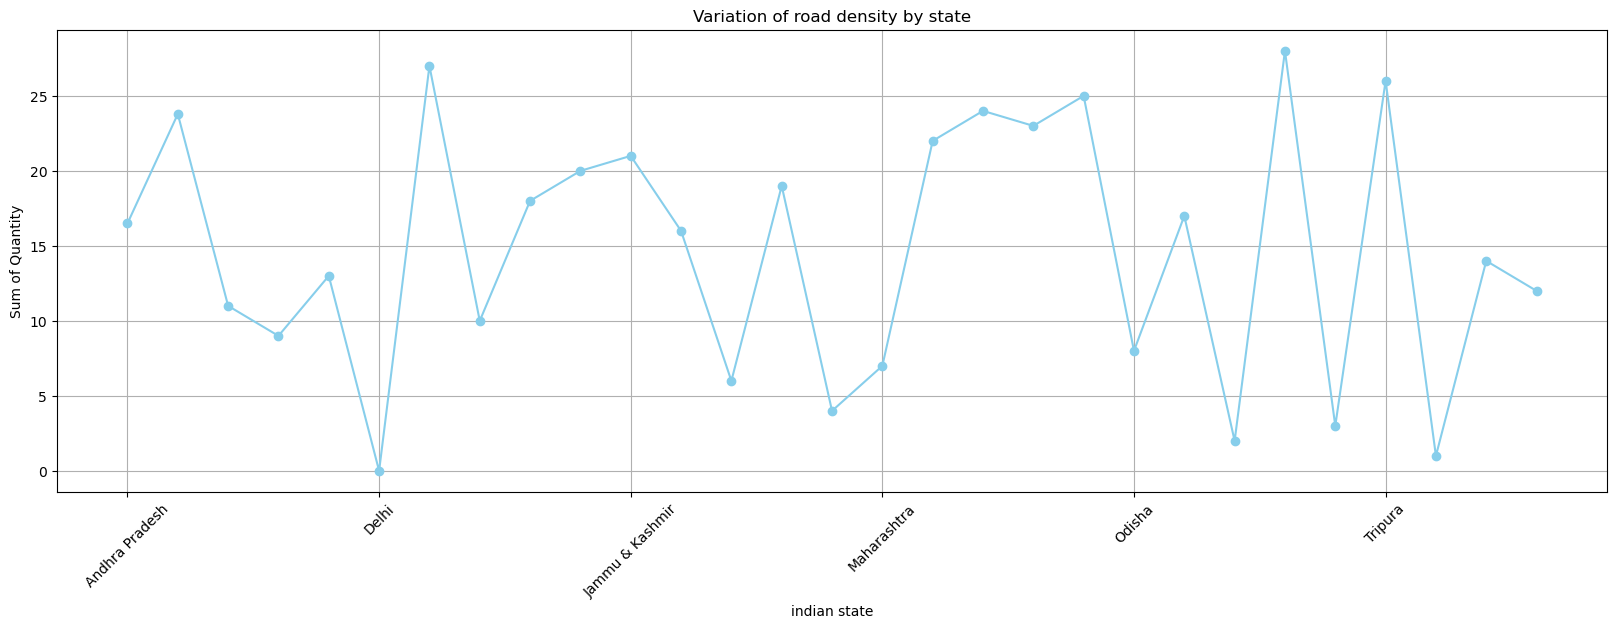

In [15]:
# Create a line chart to see road density per state
state_names = evi['State Name'].unique()


plt.figure(figsize=(20, 6))
statewiseroaddensity.index = state_names  
statewiseroaddensity.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('indian state')
plt.ylabel('Sum of Quantity')
plt.title('Variation of road density by state')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [16]:
# One-hot encode the categorical variable
evi_encoded = pd.get_dummies(evi, columns=['State Name'], drop_first=True)
evi_encoded

,No. of Operational PCS,road density(m/km sqd.),Road length state in KM,AQI,avg. temp,avg. humidity,Total\n(in MW),% Renewable,State Name_Arunachal Pradesh,State Name_Assam,...,State Name_Nagaland,State Name_Odisha,State Name_Punjab,State Name_Rajasthan,State Name_Sikkim,State Name_Tamil Nadu,State Name_Tripura,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
0,587,16.50,13788,80,33,61,27442.32,0.3978,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,23.79,10518,62,32,72,1259.34,1.0000,1,0,...,0,0,0,0,0,0,0,0,0,0
2,48,11.00,3134,74,29,84,1876.40,0.2819,0,1,...,0,0,0,0,0,0,0,0,0,0
3,83,9.00,3766,72,31,76,8787.41,0.0441,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,13.00,3419,58,28,75,24688.32,0.0405,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1845,0.00,28408,129,32,27,2478.52,0.1090,0,0,...,0,0,0,0,0,0,0,0,0,0
6,44,27.00,279,76,28,59,69.93,0.3136,0,0,...,0,0,0,0,0,0,0,0,0,0
7,195,10.00,19761,99,32,49,43588.37,0.4475,0,0,...,0,0,0,0,0,0,0,0,0,0
8,232,18.00,2523,139,33,24,7036.70,0.1812,0,0,...,0,0,0,0,0,0,0,0,0,0
9,27,20.00,1824,65,30,28,11309.49,1.0000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardizing the numerical features
scaler = StandardScaler()
numerical_cols = ['No. of Operational PCS', 'road density(m/km sqd.)', 'Road length state in KM', 'AQI', 'avg. temp', 'avg. humidity', 'Total\n(in MW)', '% Renewable']
evi_encoded[numerical_cols] = scaler.fit_transform(evi_encoded[numerical_cols])

evi_encoded[numerical_cols]

,No. of Operational PCS,road density(m/km sqd.),Road length state in KM,AQI,avg. temp,avg. humidity,Total\n(in MW),% Renewable
0,0.987818,0.214870,0.671096,0.296834,1.218270,0.020872,0.993460,-0.292463
1,-0.596358,1.084929,0.321936,-0.246841,0.802625,0.533036,-0.858172,1.392686
2,-0.489467,-0.441552,-0.466504,0.115609,-0.444310,1.091761,-0.814535,-0.616789
3,-0.393539,-0.680252,-0.399021,0.055201,0.386980,0.719278,-0.325795,-1.282230
4,-0.494948,-0.202853,-0.436073,-0.367657,-0.859955,0.672718,0.798700,-1.292304
5,4.435728,-1.754398,2.232172,1.776837,0.802625,-1.562182,-0.771953,-1.100618
6,-0.500430,1.468041,-0.771352,0.176017,-0.859955,-0.072249,-0.942286,-0.528082
7,-0.086571,-0.560902,1.308873,0.870712,0.802625,-0.537853,2.135291,-0.153387
8,0.014838,0.393895,-0.531745,2.078878,1.218270,-1.701863,-0.449604,-0.898580
9,-0.547023,0.632594,-0.606382,-0.156228,-0.028665,-1.515622,-0.147437,1.392686


In [18]:
# Apply PCA to the combined numerical features
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(evi_encoded[numerical_cols])
pca_result

array([[ 1.49234652,  0.09452699],
       [-1.17211336,  0.87445116],
       [-0.72505322, -0.65422492],
       [ 0.11404599, -0.44942768],
       [-0.2895768 , -1.34178792],
       [ 4.73795957,  0.27512918],
       [-1.48897087,  0.58667083],
       [ 2.26330864, -0.23344137],
       [ 1.36498014,  2.46826524],
       [-0.77794004,  1.57240015],
       [-1.55284624,  1.22825813],
       [-1.38962509, -1.11389211],
       [ 2.06715141, -0.87931645],
       [-0.85990298,  0.42140198],
       [ 1.80115611,  0.16658299],
       [ 3.17407769, -1.71367947],
       [-2.6258659 , -0.71908934],
       [-3.52446463, -1.53949986],
       [-3.18107399, -0.96580771],
       [-2.48853724,  0.34668885],
       [-0.56162405, -1.34600128],
       [ 0.7141388 ,  2.27965567],
       [ 0.71503332, -1.27845977],
       [-1.52765349,  1.87189365],
       [ 2.64128592, -1.16916198],
       [-0.94861293,  0.44829715],
       [ 2.35045175, -0.14161378],
       [ 0.24985381,  2.35693003],
       [-0.57192886,

In [19]:
# seeing the weightage  of variables in each principal component
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numerical_cols, index=['PC1', 'PC2'])
print("Variable Loadings in Principal Components:")
print(loadings_df)

Variable Loadings in Principal Components:
     No. of Operational PCS  road density(m/km sqd.)  Road length state in KM  \
PC1                0.388348                -0.405200                 0.411657   
PC2               -0.099059                 0.317386                -0.271375   

          AQI  avg. temp  avg. humidity  Total\n(in MW)  % Renewable  
PC1  0.396619   0.317806      -0.270177        0.349815    -0.248723  
PC2  0.323934   0.484835      -0.579738       -0.308865     0.210516  


**Interpretation**
The first component has more to do with Technology and infrastructure and second one has more to do with environmental factors and climate. 

In [20]:
# Creating a new DataFrame with PCA components
pca_evi = pd.DataFrame(data=pca_result, columns=['Infrastructure component', 'Environmental component'])
pca_evi



,Infrastructure component,Environmental component
0,1.492347,0.094527
1,-1.172113,0.874451
2,-0.725053,-0.654225
3,0.114046,-0.449428
4,-0.289577,-1.341788
5,4.737960,0.275129
6,-1.488971,0.586671
7,2.263309,-0.233441
8,1.364980,2.468265
9,-0.777940,1.572400


In [21]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_evi[['Infrastructure component', 'Environmental component']])
    wcss.append(kmeans.inertia_)


C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a m

In [22]:
# Determine the optimal number of clusters using the "Elbow Method"
optimal_clusters = None
for i in range(1, len(wcss) - 1):
    reduction_ratio = (wcss[i] - wcss[i + 1]) / (wcss[i - 1] - wcss[i])
    if reduction_ratio > 0.9:
        optimal_clusters = i + 1 
        break

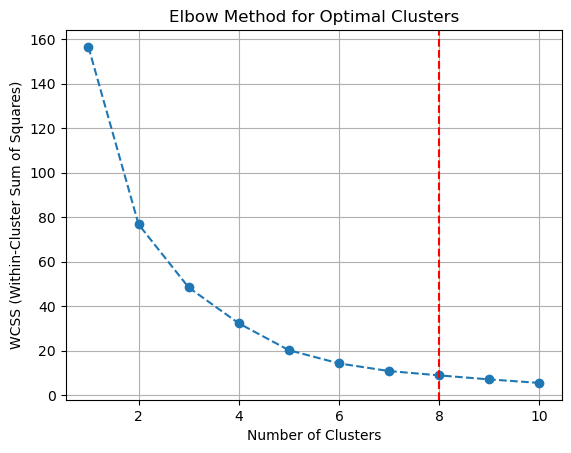

In [23]:
# Plotting the Elbow Method graph and highlight the optimal cluster count
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
if optimal_clusters is not None:
    plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.grid(True)
plt.show()


*Conclusion:We need to make 8 number of clusters*

In [24]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
pca_evi['Cluster'] = kmeans.fit_predict(pca_evi[['Infrastructure component', 'Environmental component']])
pca_evi['Cluster']

C:\Users\sujoydutta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0     2
1     4
2     1
3     1
4     1
5     7
6     4
7     2
8     0
9     5
10    5
11    1
12    2
13    4
14    2
15    6
16    3
17    3
18    3
19    4
20    1
21    0
22    1
23    5
24    6
25    4
26    2
27    0
28    1
Name: Cluster, dtype: int32

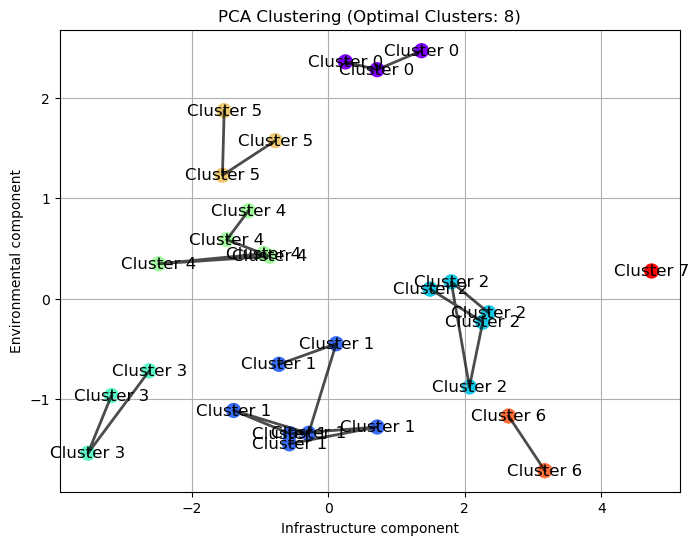

In [35]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_evi['Infrastructure component'], pca_evi['Environmental component'], c=pca_evi['Cluster'], cmap='rainbow', s=100)


for i, txt in enumerate(pca_evi['Cluster']):
    plt.annotate(f'Cluster {txt}', (pca_evi['Infrastructure component'][i], pca_evi['Environmental component'][i]), fontsize=12, color='black', ha='center', va='center')

for cluster_num in set(pca_evi['Cluster']):
    cluster_points = pca_evi[pca_evi['Cluster'] == cluster_num]
    plt.plot(cluster_points['Infrastructure component'], cluster_points['Environmental component'], linestyle='-', linewidth=2, color='black', alpha=0.7)


plt.xlabel('Infrastructure component')
plt.ylabel('Environmental component')
plt.title(f'PCA Clustering (Optimal Clusters: {optimal_clusters})')

plt.grid(True)
plt.show()

**Observation:**
In this scenario, we can clearly see there is a tradeoff between Infrastructure and Environment. Our goal is to find the best of both worlds so that we can launch our Electric Vehicles. As we can see in this graph that Cluster 7 has the best Infrastructure but performs poor in terms of environmental factors. Hence we can say the state in Cluster 7 will do the best for launching the Electric Vehicles as it is known that the people living in the place with high quality of infrastructure have higher literacy and higher purchasing power. Then we would gradually moves to states in Cluster 2 and Cluster 6 as they have a less better infrastructural quality and poor environmental factors. Launching Electric Vehicles in such areas and marketing them as a solution to pollution could help skyrocket sales of Electric Vehicles in such areas. They would have a bit less purchasing power than cluster 7 and segmentation of customers could be needed. Clusters 4, 5 and 0 dont have good infrastructure and have amazing environmental factors, so marketing here would need extra resources and manpower. In my opinion these clusters along with clusters 3 and 1 are not feasible for Electric Vehicle launch.  

In [26]:
# Concatenating the dataframes side by side
evi_combined = pd.concat([evi, pca_evi], axis=1)

evi_combined

,State Name,No. of Operational PCS,road density(m/km sqd.),Road length state in KM,AQI,avg. temp,avg. humidity,Total\n(in MW),% Renewable,Infrastructure component,Environmental component,Cluster
0,Andhra Pradesh,587,16.50,13788,80,33,61,27442.32,0.3978,1.492347,0.094527,2
1,Arunachal Pradesh,9,23.79,10518,62,32,72,1259.34,1.0000,-1.172113,0.874451,4
2,Assam,48,11.00,3134,74,29,84,1876.40,0.2819,-0.725053,-0.654225,1
3,Bihar,83,9.00,3766,72,31,76,8787.41,0.0441,0.114046,-0.449428,1
4,Chhattisgarh,46,13.00,3419,58,28,75,24688.32,0.0405,-0.289577,-1.341788,1
5,Delhi,1845,0.00,28408,129,32,27,2478.52,0.1090,4.737960,0.275129,7
6,Goa,44,27.00,279,76,28,59,69.93,0.3136,-1.488971,0.586671,4
7,Gujarat,195,10.00,19761,99,32,49,43588.37,0.4475,2.263309,-0.233441,2
8,Haryana,232,18.00,2523,139,33,24,7036.70,0.1812,1.364980,2.468265,0
9,Himachal Pradesh,27,20.00,1824,65,30,28,11309.49,1.0000,-0.777940,1.572400,5


In [27]:
#seeing the states by segment
evi_subset = evi_combined.iloc[:, [0, -1]]
evi_subset

,State Name,Cluster
0,Andhra Pradesh,2
1,Arunachal Pradesh,4
2,Assam,1
3,Bihar,1
4,Chhattisgarh,1
5,Delhi,7
6,Goa,4
7,Gujarat,2
8,Haryana,0
9,Himachal Pradesh,5


In [32]:
# Grouping the dataframe by cluster and displaying the respective state names by their cluster
result = evi_subset.groupby('Cluster')['State Name'].agg(', '.join).reset_index()
pd.set_option('display.max_colwidth', None)
result

,Cluster,State Name
0,0,"Haryana, Punjab, Uttarakhand"
1,1,"Assam, Bihar, Chhattisgarh, Jharkhand, Odisha, Rajasthan, West Bengal"
2,2,"Andhra Pradesh, Gujarat, Karnataka, Madhya Pradesh, Uttar Pradesh"
3,3,"Manipur, Meghalaya, Mizoram"
4,4,"Arunachal Pradesh, Goa, Kerala, Nagaland, Tripura"
5,5,"Himachal Pradesh, Jammu & Kashmir, Sikkim"
6,6,"Maharashtra, Tamil Nadu"
7,7,Delhi
